In [1]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
iphone_reviews = []

In [3]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [4]:
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [5]:
import os
os.getcwd()

'C:\\Users\\Amit D\\Documents\\Python Assignment'

In [6]:
red_rev_string = " ".join(iphone_reviews)

In [7]:
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string =re.sub("[0-9" "]+"," ",red_rev_string)

In [8]:
red_rev_string

' as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s which looks square and it feels good in the hand it feels better than the sleek bezel of the iphone x especially the mm thickness with right angles the border is particularly stylish the camera is awesome the night view mode turns on automatically and the imaging effect is really good video stabilization is also good the filter mode is quite good many android phones are still many miles away from these tones even though there are good imitations apple was able to improve its tones image quality is perfect and there is little or no noise even in a low light environment signal nothing to say it is much better in iphone pro wifi also consthere is a problem with the hand handling of this phone oh yes the iphone is light to handle however it is not easy to handle the iphone comes with metal edges and there have been multiple complaints with respect to these edges if you handle this p

In [9]:
red_rev_words = red_rev_string.split(" ")

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Amit
[nltk_data]     D\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [12]:
red_rev_string =" ".join(red_rev_words)

In [13]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

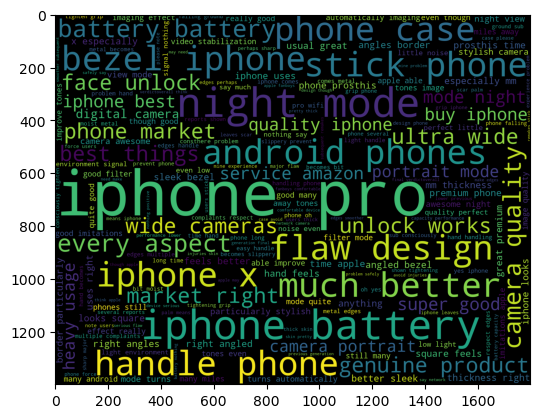

In [14]:
plt.imshow(wordcloud_ip)

In [15]:
with open(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\11 Text Mining\negative-words.txt","r",encoding="ISO-8859-1") as neg:
  negwords = neg.read().split("\n")

In [16]:
negwords =negwords[37:]

In [17]:
red_pos = " ".join([w for w in red_rev_words if w in negwords])

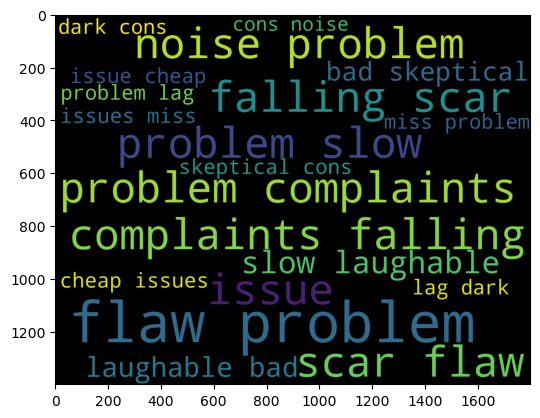

In [18]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

In [19]:
red_unique = list(set(" ".join(iphone_reviews).split(" ")))

In [20]:
red_unique

['',
 'improve',
 'of',
 'Excellent.Apple',
 'straight',
 'aspects.It',
 'many',
 'things',
 'passcode',
 'amount',
 'first',
 '4S,',
 'takes',
 'Wifi',
 'me',
 'anyone’s',
 'sending',
 'extra',
 'cams.Instead',
 'my',
 'Prebooked',
 'pictures,',
 'bad',
 'safe.',
 'three',
 'Go',
 'width',
 'we',
 'If',
 'yes,',
 'is',
 '16GB.\n',
 'there',
 'perfect.The',
 'gripping',
 'Amazon.\n',
 'right-angled',
 'lovely',
 'issues.I',
 'problem',
 'imaging',
 'Several',
 'quality',
 'wear',
 'outside',
 'pro,',
 'available',
 'chip',
 'generation.Final',
 'that',
 'palm.',
 'pro.',
 'care',
 'Portrait',
 'consume',
 'tiny',
 "you'll",
 'often.',
 'Awesome.',
 '.ProsThis',
 'r',
 'battery!!!,',
 'Face',
 'tones.Image',
 'pros',
 'photographer',
 'colour',
 'Mode.',
 '\nBest',
 'good.',
 'Signal,',
 'look.Awesome',
 ')',
 'iphone12pro',
 'stabilization',
 'proved',
 'better.',
 'like',
 'I’m',
 'sides.',
 'an',
 'shown',
 'matters.The',
 '&',
 'multiple',
 'years.',
 'iPhones',
 'trying',
 'videos.

In [41]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv(r'C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\11 Text Mining\afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [42]:
afinn.head(20)

,ï»¿word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [23]:
import nltk
nltk.download('punkt')
from nltk import tokenize
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

[nltk_data] Downloading package punkt to C:\Users\Amit
[nltk_data]     D\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes with metal edges and there have been multiple complaints with respect to these edges.',
 'If you handle this phone for a long time, as your hand becomes a bit moist, the metal becomes slippery.',
 'To prevent your phone from falling to the ground, you will sub-consciously tighten your grip on the phone.',
 'Several reports have shown that tightening your grip on the iPhone 12 leaves you with a scar on your palm.']

In [24]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nAs usual great & premium phone of 2020 .Pros...
1,It feels better than the sleek bezel of the iP...
2,The border is particularly stylish.The camera ...
3,"The night view mode turns on automatically, an..."
4,Video stabilization is also good!!!!!!!
...,...
706,If you are a photographer or loves taking pict...
707,👍\n \nBeen using iphone12pro since January & I...
708,Many used to tell me that buying 12 pros onlin...
709,But it's working well so far.


In [26]:
affinity_scores = afinn.set_index('ï»¿word')['value'].to_dict()

In [27]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

In [28]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [29]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [30]:
calculate_sentiment(text = 'amazing')

4

In [31]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [32]:
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    32
1    18
2     8
3    14
4     5
5     6
6    17
7    23
8     5
9    21
Name: word_count, dtype: int64

In [33]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
590,"But overall , its good phone and worth the pri...",13,49
226,Stunning look.Awesome experience using dark mo...,14,14
700,Stunning look.Awesome experience using dark mo...,14,14
384,Stunning look.Awesome experience using dark mo...,14,14
68,Stunning look.Awesome experience using dark mo...,14,14
621,Stunning look.Awesome experience using dark mo...,14,14
147,Stunning look.Awesome experience using dark mo...,14,14
542,Stunning look.Awesome experience using dark mo...,14,14
305,Stunning look.Awesome experience using dark mo...,14,14
463,Stunning look.Awesome experience using dark mo...,14,14


In [34]:
sent_df['sentiment_value'].describe()

count    711.000000
mean       2.227848
std        3.176296
min       -3.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       14.000000
Name: sentiment_value, dtype: float64

In [35]:
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
1,It feels better than the sleek bezel of the iP...,0,18
8,"** Signal, nothing to say!",0,5
9,It is much better in iPhone 12 Pro & Wifi also...,-2,21
11,The iPhone 12 comes with metal edges and there...,0,18
12,"If you handle this phone for a long time, as y...",0,20


In [36]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
37,"But overall , its good phone and worth the pri...",13,49
59,This iPhone 12pro Is the best in all the thing...,11,41
63,I ordered the phone on 20th June at night (11:...,10,27
68,Stunning look.Awesome experience using dark mo...,14,14
116,"But overall , its good phone and worth the pri...",13,49


In [37]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Amit D\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

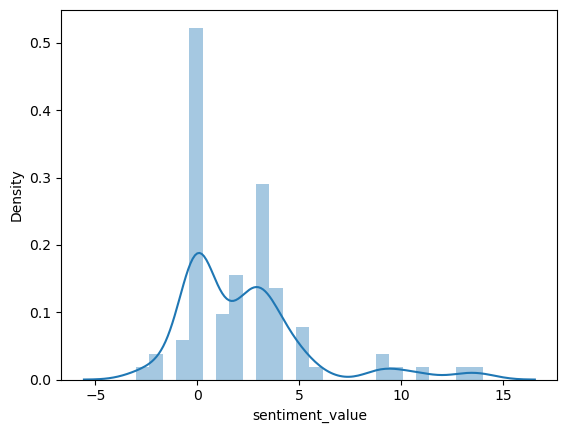

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

# 1. The shape of the histogram shows the distribution of sentiment values in the data. As it is skewed to positive side, it indicates that the sentiments are positive frequently. 
# 2. As the histogram has two peaks so it indicates a mode where sentiment values are more concentrated.
# 3. As few bars are tall, the values are clustered around a specific sentiment range i.e. 2 & 3.
# 4. As the bars are more spread out, the sentiment values looks more dispersed. 
# 5. Also isolated bars in the above graph shows the presence of Outliers also.

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

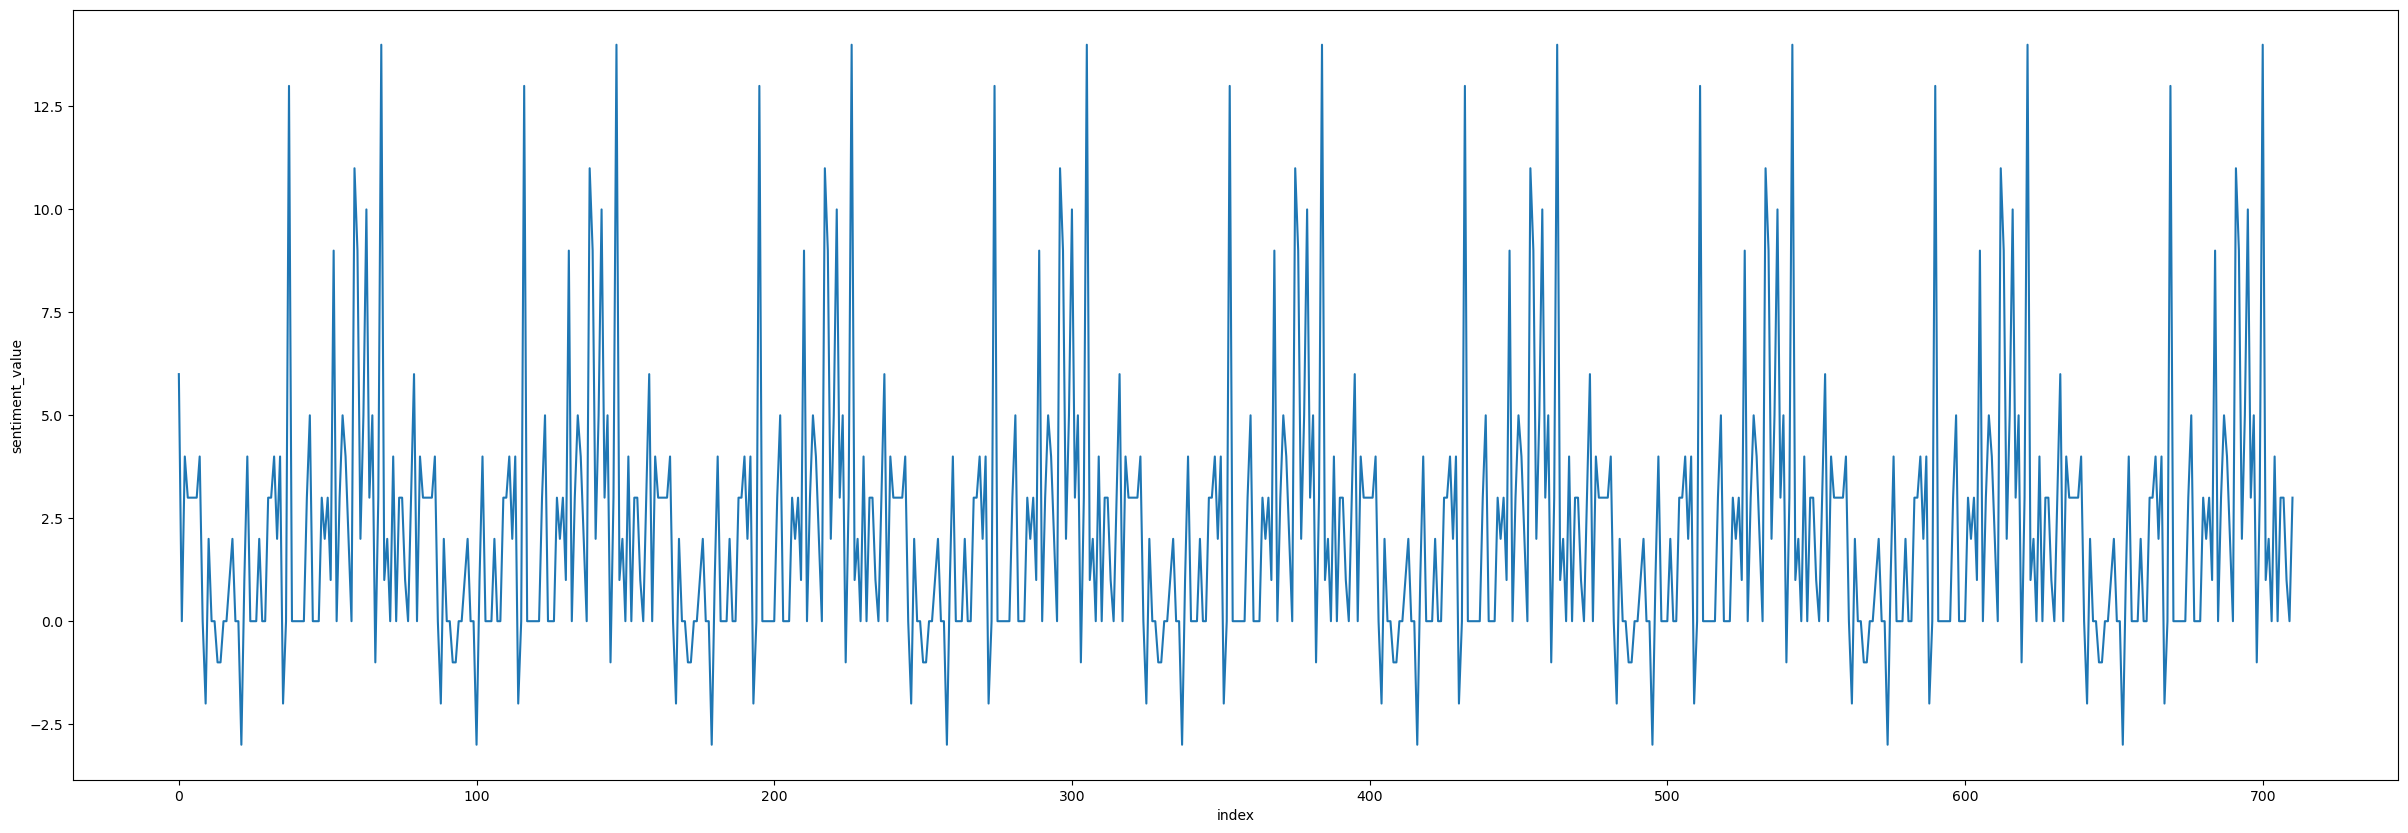

In [45]:
plt.figure(figsize=(30, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

# 1. The line's fluctuations around its general trajectory indicates variability in sentiment values. Smaller fluctuations suggests relatively stable sentiment values, while larger fluctuations suggests more variability.
# 2. We can see that similar trend is repeated after every 100 index values ie every year mostly same sentiments are recorded. And within that 100 index points trend is mostly high at the middle that is around 50-60 index points.
# 3. Few outliers are also present that are repeated very frequently may be due to seasonal or holiday sentiments for the product which occurs on that time period every year.

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

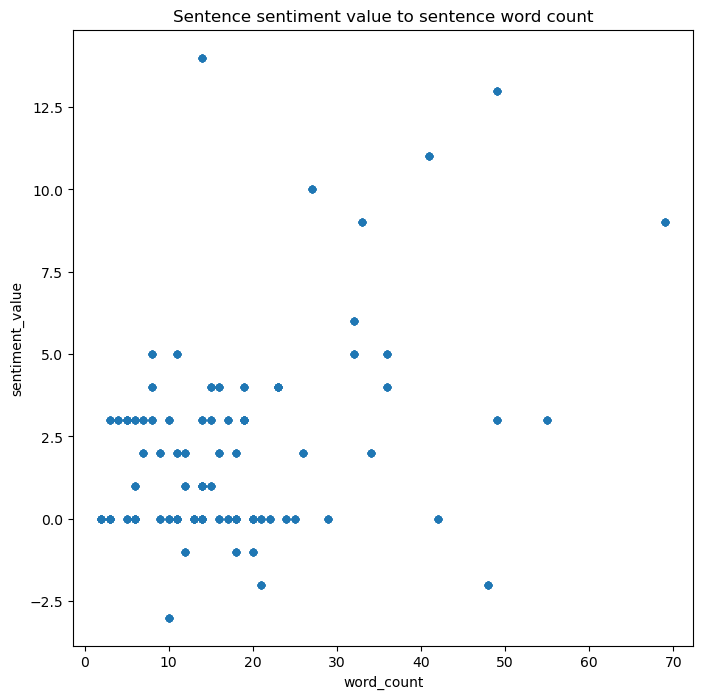

In [40]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# 1. Each data point in the scatter plot represents a sentence's 'word_count' on the x-axis and its corresponding 'sentiment_value' on the y-axis. The points are plotted individually, without connecting lines or smoothing curves.
# 2. By observing the scatter plot we can clearly state that most of the statments made are small and precise and of neutral sentiments. Also we can say that there is not much negative sentiments so clearly the product is a big YES to the customers.
# 3. Graph shows that the cluster mostly lies in between 0-5 in sentiments and in 0-25 word counts so these are clusters with similar characteristics.
# 4. Few Outliers are also seen that deviate significantly from the general pattern. These points represent unique cases that warrant further investigation.